# Analysis Of The FIFA 19 Complete Player Data Set

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# READING THE DATA.
df=pd.read_csv("data.csv")

In [3]:
# PREVIEWING THE DATA.
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [20]:
# CHECKING THE SHAPE AND ALL COLUMNS.
df.shape, df.columns

((18207, 89),
 Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
        'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
        'Preferred Foot', 'International Reputation', 'Weak Foot',
        'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
        'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
        'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
        'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
        'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
        'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
        'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
        'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
        'Marking',

In [4]:
# DESCRIBING DATA TO SEE SOME CORE STATISTICS ABOUT A PARTICULAR COLUMN.
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
# MIN AND MAX AGE IN THE DATA.
df['Age'].min(), df['Age'].max()

(16, 45)

In [5]:
# COUNT OF PLAYERS WHO PREFER RIGHT FOOT AND COUNT OF PLAYERS WHO PREFER LEFT FOOT. 
df['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [6]:
# COUNT OF PLAYERS WITH DIFFERENT BODY TYPES.
df['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Akinfenwa                  1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Neymar                     1
Courtois                   1
C. Ronaldo                 1
Messi                      1
Name: Body Type, dtype: int64

In [7]:
# PERCENT OF PLAYERS WITH RIGHT AS THEIR PREFERRED FOOT AND PERCENT OF PLAYERS WITH LEFT AS THEIR PREFERRED FOOT.
df['Preferred Foot'].value_counts() * 100 / len(df)

Right    76.607898
Left     23.128467
Name: Preferred Foot, dtype: float64

In [9]:
# MAX VALUE IN THE OVERALL COLUMN.
df['Overall'].max()

94

In [8]:
# PLAYER(S) WITH THE MAXIMUM OVERALL VALUE.
BestPlayer=df[df['Overall']==94]

In [9]:
# NAME OF PLAYER(S) WITH MAXIMUM OVERALL VALUE.
BestPlayer['Name']

0             L. Messi
1    Cristiano Ronaldo
Name: Name, dtype: object

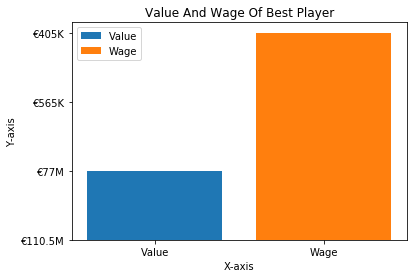

In [56]:
# VALUE AND WAGE OF BEST PLAYER BAR PLOT.
plt.bar('Value',BestPlayer['Value'],label='Value')
plt.bar('Wage',BestPlayer['Wage'],label='Wage')
plt.title('Value And Wage Of Best Player')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.savefig('ValueAndWageOfBestPlayer.jpg')
plt.show()

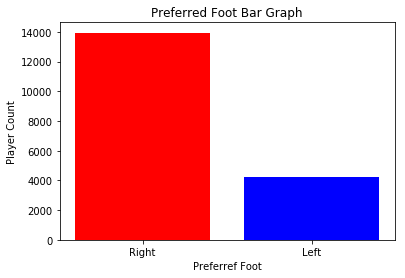

In [10]:
# PREFERRED FOOT BAR GRAPH
X=['Right','Left']
plt.bar(X,df['Preferred Foot'].value_counts(),color=['r','b'])
plt.title('Preferred Foot Bar Graph')
plt.xlabel('Preferref Foot')
plt.ylabel('Player Count')
plt.savefig('PreferredFootBarGraph.jpg')
plt.show()

In [11]:
# SEPERATING DATA AND CREATING DIFFERENT DATAFRAMES ON THE BASIS OF CLUB NAMES.
Barca=df[df['Club']=='FC Barcelona']
ManU=df[df['Club']=='Manchester United']
Chelsea=df[df['Club']=='Chelsea']
Juv=df[df['Club']=='Juventus']
clubs=[Barca['Club'].value_counts(),ManU['Club'].value_counts(),Chelsea['Club'].value_counts(),Juv['Club'].value_counts()]

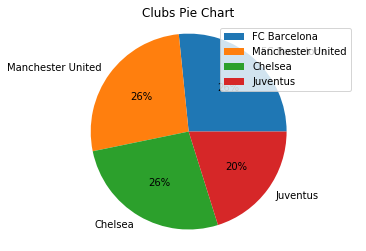

In [12]:
# NUMBER OF PLAYERS AVAILABLE IN DIFFERENT CLUBS PIE CHART.
elabel=['FC Barcelona','Manchester United','Chelsea','Juventus']
plt.pie(clubs,labels=elabel,autopct='%1d%%')
plt.axis('equal')
plt.title('Clubs Pie Chart')
plt.legend(loc='best')
plt.savefig('ClubsPieChart.jpg')
plt.show()

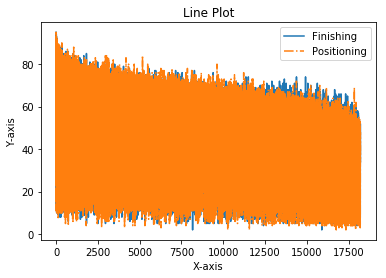

In [13]:
# FINISHING AND POSITIONING LINE PLOT.
plt.plot(df['Finishing'],label='Finishing')
plt.plot(df['Positioning'],label='Positioning',linestyle='-.')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot')
plt.legend()
plt.savefig('LinePlot.jpg')
plt.show()

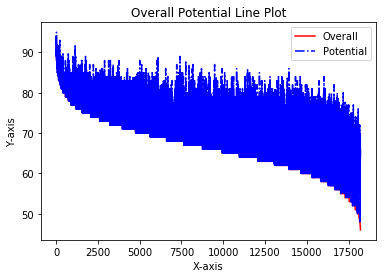

In [14]:
# OVERALL AND POTENTIAL LINE PLOT.
plt.plot(df['Overall'],label='Overall',color='r')
plt.plot(df['Potential'],label='Potential',linestyle='-.',color='b')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Overall Potential Line Plot')
plt.legend()
plt.savefig('OverallPotentialLinePlot.jpg')
plt.show()

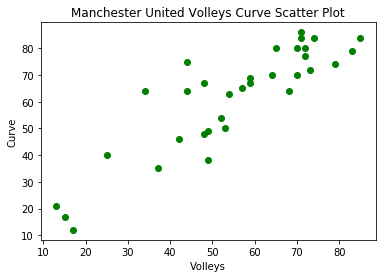

In [108]:
# Manchester United Volleys Curve Scatter Plot.
plt.scatter(ManU['Volleys'],ManU['Curve'],color='g')
plt.xlabel('Volleys')
plt.ylabel('Curve')
plt.title('Manchester United Volleys Curve Scatter Plot')
plt.savefig('ManUVolleysCurveScatterPlot.jpg')
plt.show()

In [15]:
# SEPERATING DATA ON THE BASIS OF PLAYER NAME HAVING VALUE EQUAL TO 'CRISTIANO RONALDO'.
Ronaldo=df[df['Name']=='Cristiano Ronaldo']

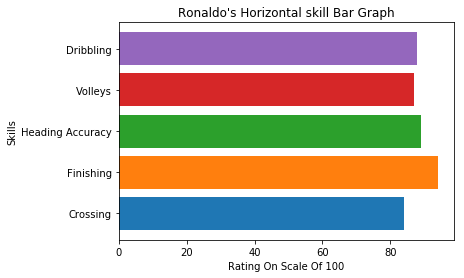

In [16]:
# RONALDO'S SKILLS BAR GRAPH.
plt.barh('Crossing',Ronaldo['Crossing'].values,label='Crossing')
plt.barh('Finishing',Ronaldo['Finishing'].values,label='Finishing')
plt.barh('Heading Accuracy',Ronaldo['HeadingAccuracy'].values,label='Heading Accuracy')
plt.barh('Volleys',Ronaldo['Volleys'].values,label='Volleys')
plt.barh('Dribbling',Ronaldo['Dribbling'].values,label='Dribbling')
plt.title('Ronaldo\'s Horizontal skill Bar Graph')
plt.xlabel('Rating On Scale Of 100')
plt.ylabel('Skills')
plt.savefig('RonaldoHorizontalskillBarGraph.jpg')
plt.show()